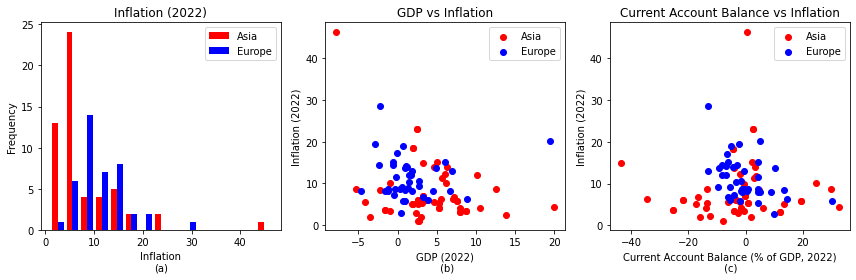

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cfe = pd.read_excel(r'C:\Users\useracc\ENDG 319\CURE32.xlsx')

# Create a copy of the DataFrame
a = cfe.copy()

# Define a function to clean non-numeric values
def clean_column(column):
    cleaned_values = []
    for value in column:
        try:
            cleaned_values.append(float(value))
        except (ValueError, TypeError):
            cleaned_values.append(np.nan)
    return cleaned_values

# Columns to clean (replace non-numeric values (aka '...') with NaN)
columns_to_clean = ['Inflation (2022)', 'GDP (2022)', 'Current Account Balance (% of GDP, 2022)']

# Clean the specified columns
for col in columns_to_clean:
    a[col] = clean_column(a[col])

asia = a[a['Category'] == 'Asia']
europe = a[a['Category'] == 'Europe']

# Histogram subplot:
plt.figure(figsize=(12, 4))
plt.subplot(131)


plt.hist([asia['Inflation (2022)'], europe['Inflation (2022)']], bins = 15, color = ['red','blue'], label = ['Asia','Europe'])
plt.title('Inflation (2022)')
plt.xlabel('Inflation\n(a)')
plt.ylabel('Frequency')
plt.legend()

# Scatterplot 1:
plt.subplot(132)
plt.scatter(asia['GDP (2022)'], asia['Inflation (2022)'], color = 'red', label = 'Asia')
plt.scatter(europe['GDP (2022)'], europe['Inflation (2022)'], color = 'blue', label = 'Europe')
plt.title('GDP vs Inflation')
plt.xlabel('GDP (2022)\n (b)')
plt.ylabel('Inflation (2022)')
plt.legend()

#Scatterplot 2:
plt.subplot(133)
plt.scatter(asia['Current Account Balance (% of GDP, 2022)'], asia['Inflation (2022)'], color='red',label = 'Asia')
plt.scatter(europe['Current Account Balance (% of GDP, 2022)'], europe['Inflation (2022)'], color='blue',label = 'Europe')
plt.title('Current Account Balance vs Inflation')
plt.xlabel('Current Account Balance (% of GDP, 2022)\n (c)')
plt.ylabel('Inflation (2022)')
plt.legend()

plt.tight_layout()
plt.show()